# Fundamentos de Aprendizaje Automático y Reconocimiento de Patrones
***
# Práctico 2

In [1]:
# Se importan las biblotecas que se van a utilizar
import numpy as np
from matplotlib import pyplot as plt
import time
import h5py # es el formato en el que están almacenados los dígitos

from visualizacion import visualizar_conjunto_entrenamiento, visualizar_modelo_lineal
from algoritmos import entrenar_perceptron

plt.rcParams['figure.figsize'] = (10.0, 10.0) # tamaño de las figuras por defecto
# el inline sirve para que las figuras se muestren dentro del notebook
%matplotlib inline  

# Se agrega para que el notebook vea los cambios realizados en los modulos que utiliza;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%reload_ext autoreload
%autoreload 2

## Objetivos

Los objetivos de este práctico son los siguientes:
    
- Fortalecer el conocimiento del **modelo lineal** mediante la formulación de las ecuaciones que permiten encontrar sus parámetros.
- Implementar la **regresión lineal** y utilizarla para resolver un problema de **regresión** y uno de **clasificación**.
- Implementar el **algoritmo pocket**. Comparar su desempeño con el de regresión lineal para clasificación.
- Separar un conjunto de datos **no linealmente separables** utilizando **clasificadores lineales** mediante la transformación de características. 
- Desarrollar un **clasificador de dígitos**.

*** 

## Lista de ejercicios

[Ejercicio 1](#Ejercicio1): modelo de regresión lineal y su implementación.        
[Ejercicio 2](#Ejercicio2): clasificación de datos sintéticos mediante regresión lineal y el algoritmo pocket. Transformación de características.      
[Ejercicio 3](#Ejercicio3): clasificación de dígitos.       


<a id="Ejercicio1"></a>
# Ejercicio 1: Regresión Lineal

En esta parte se trabajará con el conjunto de datos *Advertising* que almacena las ventas de un producto en 200 mercados diferentes junto con lo invertido en publicidad en diferentes medios de prensa: televisión, radio y prensa escrita. El objetivo es determinar la relación que existe entre las ventas y lo invertido en publicidad asumiendo un modelo lineal.

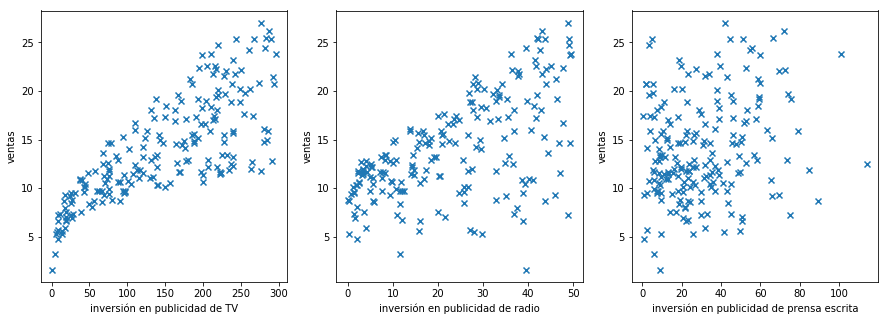

In [2]:
X_names = ['TV','radio','prensa escrita']
y_name = ['ventas']

#############################################################################
################  EMPIEZA ESPACIO PARA COMPLETAR  ###########################
#############################################################################

# utilizar la función de numpy loadtxt() para cargar los datos. La primera
# fila no tiene que ser leída



data = np.loadtxt('Advertising.csv', usecols=(0,1,2,3,4), delimiter=',',skiprows=1)
#############################################################################
################  TERMINA ESPACIO PARA COMPLETAR  ###########################
#############################################################################

X=data[:,0:4]
X[:,0]=1
y=data[:,4:]

plt.figure(figsize=(15,5))
for p in range(3):
    plt.subplot(1,3, p+1)
    plt.scatter(X[:, 1+p], y, marker='x', label=X_names[p])
    plt.xlabel('inversión en publicidad de ' + X_names[p])
    plt.ylabel(y_name[0])

**Pregunta:** ¿Por qué se dice que este es un problema de regresión?

**Respuesta:**  
La salida es un número real.

**Pregunta:** Asuma que existe una relación lineal entre entradas y salida, exprese matemáticamente dicho modelo e indique claramente cuáles son las entradas y salidas del modelo. ¿Cuántos parámetros deben determinarse?

**Respuesta:**  
$(\mathbf{x}_n,y_n)$: Pares de datos con sus etiquetas, entradas del algoritmo de aprendisaje.
$\mathbf{x}_n = [x_0(=1),x_1,x_2,x_3]^T$
$\mathbf{w} = [w_0,w_1,w_2,w_3]$: salidas del algoritmo de aprendisaje.
$h(\mathbf{x}) = \sum_{i=0}^{d}w_ix_i = \mathbf{w}^T\mathbf{x}$


**Pregunta:** Expresar el sistema de ecuaciones a resolver y la solución al mismo bajo el criterio de mínimos cuadrados en el caso de contar con $N$ puntos. 

**Respuesta:**    
Minimizar: $E_{in}(h) = \frac{1}{N}\sum_{n=1}^N(h(\mathbf{x}_n)-y_n)^2$

$$E_{in}(h) =\frac{1}{N}\sum_{n=1}^N(\mathbf{w}^T\mathbf{x}_n-y_n)^2=\frac{1}{N}||X\mathbf{w}-\mathbf{y}||^2=\frac{1}{N}(\mathbf{w}^TX^TX\mathbf{w}-2\mathbf{w}^TX^T\mathbf{y}+\mathbf{y}^T\mathbf{y})$$

$\nabla_{\mathbf{w}}(\mathbf{w}^TA\mathbf{w})=(A+A^T)\mathbf{w}$ ; $\nabla_{\mathbf{w}}(\mathbf{w}\mathbf{b})=\mathbf{b}$

$$\Rightarrow \nabla E_{in}(\mathbf{w}_{lin}) = \frac{2}{N}(X^TX\mathbf{w}_{lin}-X^T\mathbf{y}) = 0$$

$$\Rightarrow \mathbf{w}_{lin} = (X^TX)^{-1}X^T\mathbf{y} =X^{\dagger}\mathbf{y}$$

Implementar la solución anteriormente descrita en el método `regresion_lineal()`.

In [3]:
def regresion_lineal(X, y):
    '''
    Entrada:
        X: matriz de Nx(d+1)
        y: vector de tamaño N
    Salida:
        w_ls: vector encontrado por la regresión lineal
    '''
    
    ###################################################
    ######## EMPIEZA ESPACIO PARA COMPLETAR CODIGO ####
    ###################################################
    
    # Sugerencia: utilizar el paquete linalg de numpy 
    # para calcular la inversa
    
    w_ls = np.linalg.inv(np.transpose(X)@X)@np.transpose(X)@y 
    
    ###################################################
    ######## TERMINA ESPACIO PARA COMPLETAR CODIGO ####
    ###################################################
    
    return w_ls

In [4]:
w_ls = regresion_lineal(X,y)
print('h(x)=',w_ls[0],'+',w_ls[1],'$x_{tele}$ +',w_ls[2],'$x_{radio}$ +',w_ls[3],'$x_{prensa}$')

h(x)= [2.93888937] + [0.04576465] $x_{tele}$ + [0.18853002] $x_{radio}$ + [-0.00103749] $x_{prensa}$


**Pregunta:** Si dispusiera de $1000 para invertir en publicidad ¿En que medio lo invertiría y cómo estima que repercutiría en las ventas?

**Respuesta:**   
Radio:

$h(x) \approx 2.94\$ + 0.19*1000\$ = 192.94\$$

In [5]:
print(2.94 + 0.19*1000)

192.94


<a id="Ejercicio2"></a>
# Ejercicio 2: Clasificación con datos sintéticos

## Generación de datos sintéticos

Se consideran dos semianillos de ancho $w$ y radio interno $r$, separados por $sep$. El centro del semianillo superior está alineado con el centro del borde donde comienza el semianillo inferior. Los datos son linealmente separables cuando $sep > 0$ y no lo son cuando $sep \leq 0$. Generar 2000 muestras uniformemente distribuídas, aproximadamente 1000 de cada clase, utilizando un radio $r=10$, un ancho $w=5$ y una separación $sep=5$.

In [6]:
def generar_semianillos(N, radio, ancho, separacion):
    '''
    Entrada:
        N: número de muestras a generar
        radio: radio interior del semicírculo
        ancho: diferencia entre el radio exterior e interior
        separación: separación entre los semicírculos
    Salida:
        X: matríz de Nx3 que contiene los datos generados en coordenadas homogéneas
        y: etiquetas asociadas a los datos
    '''
        
    X = np.ones((N, 3))
    # se sortea a que clase pertenecen las muestras
    y = 2 * (np.random.rand(N) < 0.5) - 1
    
    # radios y ángulos del semicírculo superior
    radios = radio + ancho * np.random.rand(N)
    thetas = np.pi * np.random.rand(N)
    # coordenadas en x de ambos semicírculos
    X[:,1] = radios * np.cos(thetas) * y + (radio + ancho/2)*(y==-1)
    # coordenadas en y de ambos semicírculos
    X[:,2] = radios * np.sin(thetas) * y - separacion * (y==-1)
    
    
    
    return X, y

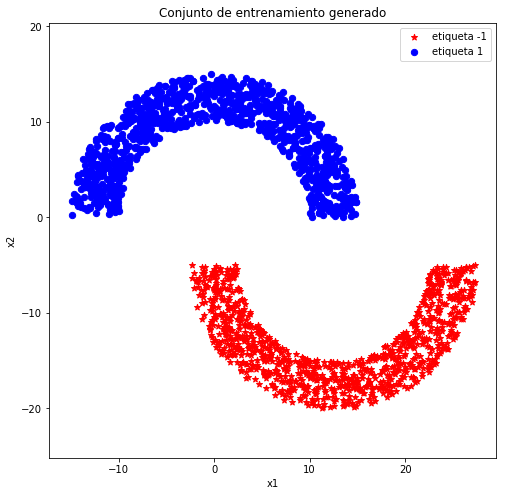

In [7]:
###################################################
######## EMPIEZA ESPACIO PARA COMPLETAR CODIGO ####
###################################################

X, y = generar_semianillos(2000, 10, 5, 5)

###################################################
######## TERMINA ESPACIO PARA COMPLETAR CODIGO ####
###################################################

visualizar_conjunto_entrenamiento(X, y)

## El perceptrón para separar clases linealmente separables

Se prové una implementación del algoritmo del perceptrón `entrenar_perceptron()` implementado en la práctica anterior. Ejecutarlo partiendo del vector de pesos inicial $\mathbf{w}=0$ hasta que converja. Mostrar los datos y la hipótesis final.

Error entrenamiento =  0.0
Iteraciones =  5


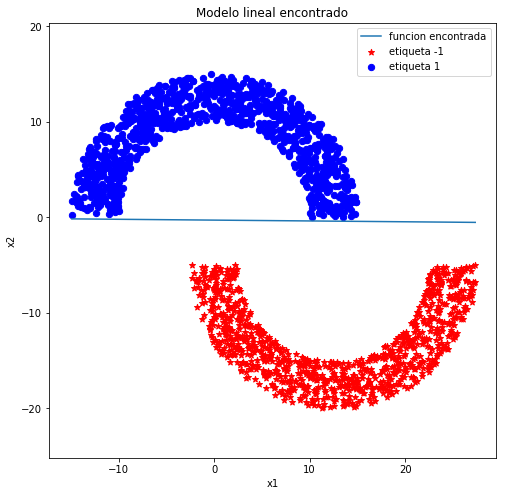

In [8]:
###################################################
######## EMPIEZA ESPACIO PARA COMPLETAR CODIGO ####
###################################################

w_perceptron, error_entrenamiento = entrenar_perceptron(X, y)


# chequear que el error de entrenamiento con el w encontrado es cero
print('Error entrenamiento = ',error_entrenamiento[len(error_entrenamiento)-1])
print('Iteraciones = ',len(error_entrenamiento))


###################################################
######## EMPIEZA ESPACIO PARA COMPLETAR CODIGO ####
###################################################

# Se grafica el resultado del entrenamiento
visualizar_modelo_lineal(X,y,w_perceptron)

## Regresión lineal como método de clasificación

Utilizar el método `regresion_lineal()` implementado anteriormente para clasificación.

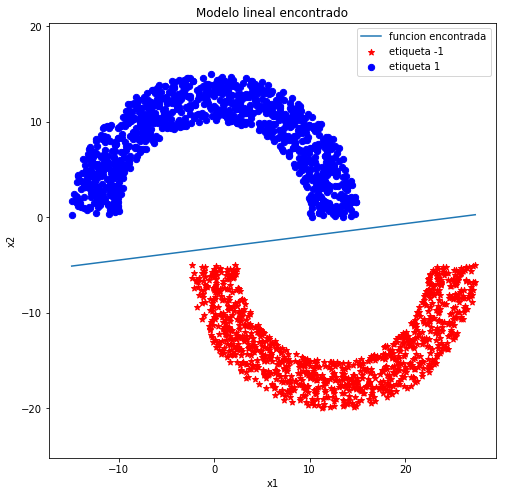

In [9]:
###################################################
######## EMPIEZA ESPACIO PARA COMPLETAR CODIGO ####
###################################################

w_ls = regresion_lineal(X, y)

###################################################
######## TERMINA ESPACIO PARA COMPLETAR CODIGO ####
###################################################

# Se grafica el resultado del entrenamiento utilizando regresión lineal
visualizar_modelo_lineal(X,y,w_ls)

**Pregunta:** Comente sobre las fronteras de decisión encontradas. ¿Prefiere alguna de ellas?

**Respuesta:**

Aparentemente la hallada con regresión generaliza mejor.

## Datos no linealmente separables

El siguiente bloque genera un conjunto de datos con $sep=-5$ y lo grafica. 

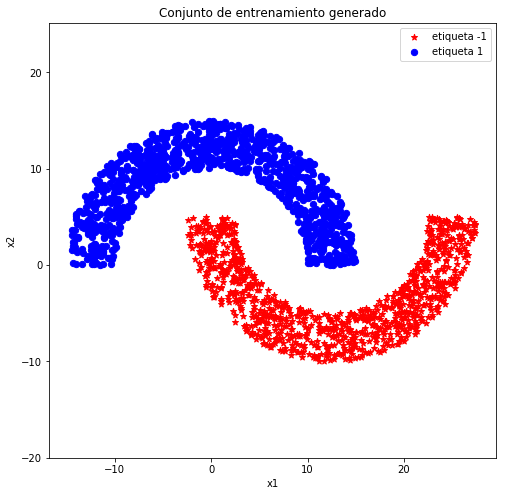

In [10]:
N=2000
r = 10; w=5; sep=-5
X, y = generar_semianillos(N, r, w, sep)

visualizar_conjunto_entrenamiento(X, y)

**Pregunta:** Explicar qué sucede al ejecutar el algoritmo del perceptrón en dicho conjunto.

**Respuesta:**    
No funicona porque no es linealmente separable.

<a id="algoritmoPocket"></a>
## El algoritmo pocket

La superficie de decisión obtenida mediante el *perceptrón* garantiza una adecuadamente separación de las dos clases solamente en el caso en que éstas son linealmente separables. Una pregunta que surge naturalmente es qué sucede cuando estas condiciones no se cumplen.  El algoritmo *pocket* es una variante del perceptrón que con cada actualización de pesos calcula el error cometido si se utiliza el nuevo vector de pesos. Al finalizar, devuelve el vector de pesos con el mínimo error.     

Completar el código del método `entrenar_pocket()`. 

In [11]:
def entrenar_pocket(X, y, w0=None, maxIteraciones = 500):
    """
    Entrada:
        X: matriz de (Nxd+1) que contiene las muestras de entrenamiento
        y: etiquetas asociadas a las muestras de entrenamiento
        w0: inicialización de los pesos del perceptrón
        maxIteraciones: máxima cantidad de iteraciones que el algoritmo puede estar 
                        iterando
        
    Salida:
        w_pocket: parámetros del modelo perceptrón   
        error: vector que contiene el error cometido en cada iteración
    """
    
    if w0 is None:
        # Se inicializan los pesos del perceptrón
        w = np.random.rand(X.shape[1]) # w = np.zeros(d+1)
        print('w inicializado aleatoriamente a ' , w)
    else:
        w = w0
        print('El w incicial es ' , w)
    
    N = X.shape[0] 
    w_pocket = w.copy()  # se inicializa el vector de pesos a devolver
    error = []  # se inicializa la lista de errores
    hayMuestrasMalClasificadas = True  
    errorActual = 1  # inicialización del error al máximo posible
    nIter = 0   # inicialización del contador de iteraciones
    
    while ((nIter < maxIteraciones) and hayMuestrasMalClasificadas):
        
        #######################################################
        ######## EMPIEZA ESPACIO PARA COMPLETAR CODIGO ########
        #######################################################
    
        # se calcula el score utilizando los pesos actuales
        score = np.dot(X, w)   
        
        # se encuentran las muestras mal clasificadas
        indicesMalClasificados = y != np.sign(score) 

        # se calcula el error en la iteración actual y se lo almacena en 
        # la lista de errores
        cantidadMalClasificadas = np.sum(indicesMalClasificados)
        error_i = cantidadMalClasificadas / N
        
        error.append(error_i)
        
        if nIter>0 and error[nIter]<error[nIter-1]:
            w_pocket = w.copy()
        
        if error_i == 0:
            hayMuestrasMalClasificadas = False     
        else:           
            # si el error es mayor que cero se elige aleatoriamente una de las muestras mal clasificadas
            indice = np.random.randint(cantidadMalClasificadas) 
            # y se la utiliza para actualizar los pesos
            w = w + y[indicesMalClasificados][indice] * X[indicesMalClasificados][indice]  # se actualizan los pesos
        
        nIter = nIter + 1





        #######################################################
        ######## TERMINA ESPACIO PARA COMPLETAR CODIGO ########
        #######################################################
    
    if(np.array_equal(w, w_pocket)):
        print('Cuidado: es poco probable que el vector de pesos devuelto sea el de la última actualización')

    
    return w_pocket, error

Ejecutar el algoritmo pocket por 100000 iteraciones y graficar el error de entrenamiento en función del número de iteraciones.

El w incicial es  [0. 0. 0.]
El algoritmo pocket demoró 11.094340 segundos
El pocket finalizó en la iteración 100000
El error de entrenamiento es 0.121000


Text(0, 0.5, 'error entrenamiento')

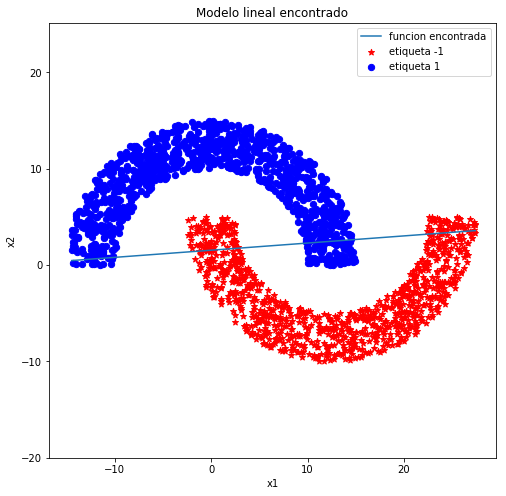

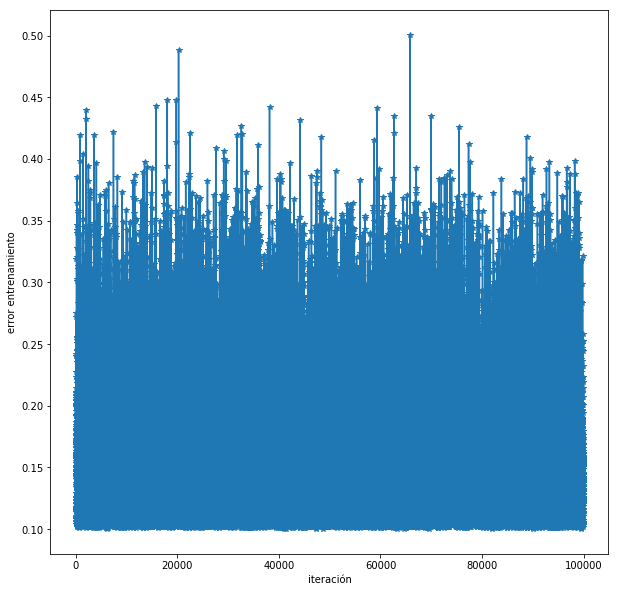

In [12]:
w_inicial = np.zeros(X.shape[1])
num_iteraciones = 100000

inicio = time.time()
#######################################################
######## EMPIEZA ESPACIO PARA COMPLETAR CODIGO ########
#######################################################

w_pocket, error_entrenamiento = entrenar_pocket(X, y, w_inicial, num_iteraciones)

#######################################################
######## TERMINA ESPACIO PARA COMPLETAR CODIGO ########
#######################################################
fin = time.time()

print('El algoritmo pocket demoró %f segundos' % (fin - inicio))
print('El pocket finalizó en la iteración %d' % len(error_entrenamiento))
print('El error de entrenamiento es %f' % error_entrenamiento[-1])

# Se grafica el resultado del entrenamiento
visualizar_modelo_lineal(X,y,w_pocket)

plt.figure(figsize=(10,10))
plt.plot(error_entrenamiento[100:],'*-')
plt.xlabel('iteración')
plt.ylabel('error entrenamiento')

**PREGUNTA:** Mencione ventajas y desventajas que presenta el *algoritmo pocket* respecto al *perceptrón tradicional*

**RESPUESTA:**  

Ventaja: Funciona para datos no linealmente separables.

Desventaja: Demora. No converge.

## Regresión lineal para clasificación

Utilizar el método `regresion_lineal()` para obtener el vector de pesos $w_{ls}$. Comparar tiempo de ejecución y calidad de la solución obtenida con los del algoritmo pocket.

C:\Users\maria\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


La regresión lineal demoró 0.000995 segundos
El error de clasificación utilizando la regresión lineal es 0.000500


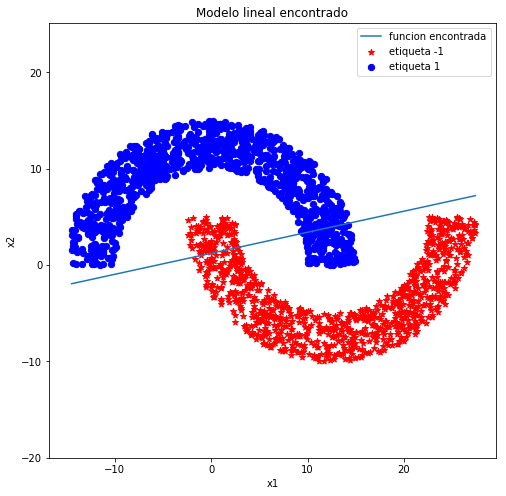

In [13]:
#######################################################
######## EMPIEZA ESPACIO PARA COMPLETAR CODIGO ########
#######################################################

inicio = time.time()

w_ls =  regresion_lineal(X, y)

fin =time.time()

indicesMalClasificados = (y != np.sign(np.dot(X, w))) 
cantidadMalClasificadas = np.sum(indicesMalClasificados)
error_i = cantidadMalClasificadas / N

error_clasificacion = error_i

#######################################################
######## TERMINA ESPACIO PARA COMPLETAR CODIGO ########
#######################################################


print('La regresión lineal demoró %f segundos' % (fin - inicio))
print('El error de clasificación utilizando la regresión lineal es %f' 
      % error_clasificacion)

# Se grafica el resultado del entrenamiento
visualizar_modelo_lineal(X,y,w_ls)



**PREGUNTA:** Mencione las principales diferencias que observa entre los resultados obtenidos mediante regresión lineal y los obtenidos por el agoritmo pocket.  

**RESPUESTA:**    
Regresión lineal es más rápido y tiene menor error.

## Transformación no lineal de los datos

En esta sección se aplicará una transformación no lineal de los datos y luego se evaluará la performance de los clasificadores (pocket, regresión lineal) en el espacio transformado. La transformación se realizará utilizando el método `transformar_usando_polinomio_de_tercer_grado()`. Completar dicho método.

In [14]:
def transformar_usando_polinomio_de_tercer_grado( X ):
    '''
    Entrada: 
        X: matriz de tamaño N x 3 que contiene las características originales en
           coordenadas homogéneas
    
    Salida:
        Xt: matriz de tamaño N x 10 que contiene las características en el espacio 
            transformado
            
            T(1,x1,x2)= (1, x1, x2, x1^2, x1x2, x2^2, x1^3, x1^2x2, x2^2x1, x2^3)
    '''
    
    #######################################################
    ######## EMPIEZA ESPACIO PARA COMPLETAR CODIGO ########
    #######################################################
    Xt = np.zeros([X.shape[0],10])
    
    Xt[:,:3] = X
    Xt[:,3] = X[:,1]**2
    Xt[:,4] = X[:,1]*X[:,2]
    Xt[:,5] = X[:,2]**2    
    Xt[:,6] = X[:,1]**3
    Xt[:,7] = X[:,1]**2*X[:,2]
    Xt[:,8] = X[:,2]**2*X[:,1]
    Xt[:,9] = X[:,2]**3
    
    #######################################################
    ######## TERMINA ESPACIO PARA COMPLETAR CODIGO ########
    #######################################################
    
    return Xt

Si la transformación encontrada es correcta la siguiente celda debería ejecutarse sin generar error.

In [15]:
pts = np.array([[1, 1, 1], [1, 2, 3], [1, 0, 2], [1, 2, 0] ])
pts_t = np.array([[ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
 [ 1.,  2.,  3.,  4.,  6.,  9.,  8., 12., 18., 27.],
 [ 1.,  0.,  2.,  0.,  0.,  4.,  0.,  0.,  0.,  8.],
 [ 1.,  2.,  0.,  4.,  0.,  0.,  8.,  0.,  0.,  0.]])

pts_t2 = transformar_usando_polinomio_de_tercer_grado(pts)

assert pts_t.shape == pts_t2.shape , 'La dimensión de la matriz de puntos transformados no es correcta'
assert np.abs(np.sum(pts_t-pts_t2)) < 1e-5, 'La transformación implementada no es correcta'

Utilizar el algoritmo pocket para separar los datos en el espacio transformado.

In [ ]:
# Se transforman las características utilizando el método implementado
Xt = transformar_usando_polinomio_de_tercer_grado( X )
w_inicial = np.zeros(Xt.shape[1])

inicio = time.time()
#######################################################
######## EMPIEZA ESPACIO PARA COMPLETAR CODIGO ########
#######################################################
num_iteraciones = 1000000

w_pocket, error_entrenamiento = entrenar_pocket(Xt, y, w_inicial,num_iteraciones)

#######################################################
######## TERMINA ESPACIO PARA COMPLETAR CODIGO ########
#######################################################
fin = time.time()


print('El algoritmo pocket demoró %f segundos' % (fin - inicio))
print('El pocket finalizó en la iteración %d' % len(error_entrenamiento))
print('El error de entrenamiento es %f' % error_entrenamiento[-1])

plt.figure(figsize=(10,10))
plt.plot(error_entrenamiento[1:],'*-')
plt.xlabel('iteración')
plt.ylabel('error entrenamiento')

El w incicial es  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


Es de esperar que la transformación no lineal de los datos haya contribuído a disminuir el error de clasificación durante el entrenamiento. Para ver cuáles son las muestras que   no pudieron clasificarse correctamente, ejecute la siguiente celda.

In [ ]:
def visualizar_frontera_decision(X, y, w):
    '''
    Entrada:
        X: matriz de Nx3 que contiene los puntos en el espacio original
        y: etiquetas de los puntos
        w: vector de tamaño 10 que contiene los parámetros encontrados
    '''

    # Se construye una grilla de 50x50 en el dominio de los datos
    xs = np.linspace( X[:,1].min(), X[:,1].max())
    ys = np.linspace( X[:,2].min(), X[:,2].max())

    XX, YY = np.meshgrid( xs, ys ) 
    Z = np.zeros_like(XX)
    
    # se transforman los puntos de la grilla
    pts_grilla = np.vstack( (np.ones(XX.size), XX.ravel(),YY.ravel()) ).T
    pts_grilla_transformados = transformar_usando_polinomio_de_tercer_grado( pts_grilla )
    
    # los puntos transformados son proyectados utilizando el w
    Z = pts_grilla_transformados @ w
    Z = Z.reshape(XX.shape)#
    
    # se grafica la frontera de decisión, es decir, la línea de nivel 0  
    plt.figure(figsize=(8,8))
    plt.contour(XX, YY, Z, [0])
    plt.scatter(X[:,1][y==1],X[:,2][y==1], s=40, color='b', marker='o', 
                label='etiqueta -1')
    plt.scatter(X[:,1][y==-1],X[:,2][y==-1], s=40, color='r', marker='x', 
                label='etiqueta 1')
    plt.title('Frontera de decision obtenida mediante transformación no lineal de datos')
    
visualizar_frontera_decision(X, y, w_pocket)

**Pregunta:** Explique brevemente cómo se implementa el método `visualizar_frontera_decision`

** Respuesta: ** 
...

Encontrar los parámetros del modelo de regresión lineal y calcular el error de clasificación cometido.

C:\Users\maria\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if __name__ == '__main__':


La regresión lineal demoró 0.016043 segundos
El error de clasificación utilizando la regresión lineal es 0.000500


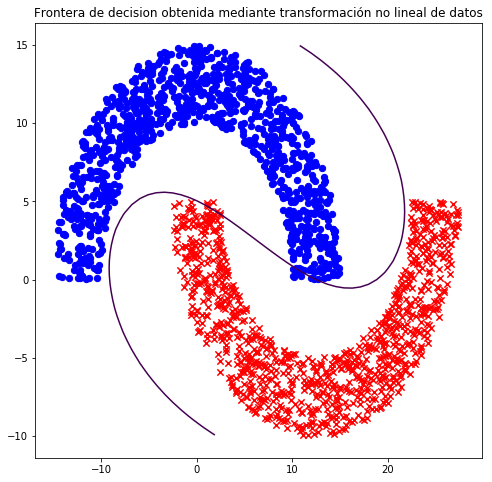

In [18]:
inicio = time.time()
#######################################################
######## EMPIEZA ESPACIO PARA COMPLETAR CODIGO ########
#######################################################

w_ls = regresion_lineal(Xt, y)


indicesMalClasificados = (y != np.sign(np.dot(X, w))) 
cantidadMalClasificadas = np.sum(indicesMalClasificados)
error_i = cantidadMalClasificadas / N
 
error_ls = error_i

#######################################################
######## TERMINA ESPACIO PARA COMPLETAR CODIGO ########
#######################################################
fin = time.time()

print('La regresión lineal demoró %f segundos' % (fin - inicio))

print('El error de clasificación utilizando la regresión lineal es %f' % error_ls)
visualizar_frontera_decision(X, y, w_ls);

**Pregunta:** Compare ambos algoritmos en términos de performance y costo computacional

**Respuesta:**   
Es mejor regresión en ambos sentidos.

**Pregunta:** ¿Son los datos linealmente separables en el espacio transformado?

**Respuesta:**   
No, sino la región de decisión los separaría.

<a id="Ejercicio3"></a>
# Ejercicio 3: Clasificación de dígitos

En esta parte se trabajará con la base USPS de dígitos disponible en [kaggle](https://www.kaggle.com/bistaumanga/usps-dataset). A continuación se cargan los datos y se muestra una imagen de cada dígito.

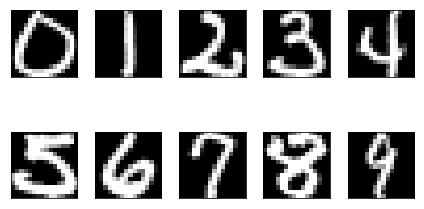

In [19]:
path='usps/usps.h5'

with h5py.File(path, 'r') as hf:
        train = hf.get('train')
        X_train = train.get('data')[:]
        y_train = train.get('target')[:]
        test = hf.get('test')
        X_test = test.get('data')[:]
        y_test = test.get('target')[:]


# Se deberían ver 2 × 5 subfiguras con una imagen  
# representativa de cada dígito

fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()
for i in range(10):
    img = X_train[y_train == i][0].reshape(16, 16)
    ax[i].imshow(img, cmap='gray')
    ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()


En esta práctica se trabajará con los dígitos uno y cinco. La función `generar_problema_dos_clases()` es la encargada de generar, a apartir de las características y etiquetas originales, un conjunto de datos listos para ser utilizados en un problema de clasificación de dos clases. 

In [20]:
def generar_problema_dos_clases(X, y, clase1, clase2):
    '''
    Entrada: 
        X: matriz de dígitos
        y: etiquetas asociadas a los dígitos
        clase1: lista con los dígitos a los que se le asignará la clase 1
        clase2: lista con los dígitos a los que se le asignará la clase -1
    Salida:
        Xb: matriz que contiene únicamente las características de los dígitos 
            clase1 y clase 2
        yb: etiquetas asignadas a los dígitos clase1 y clase2 (1 o -1)
    '''
    
    indicesClase1 = [ etiqueta in clase1 for etiqueta in y ] 
    indicesClase2 = [ etiqueta in clase2 for etiqueta in y ]

    clase1 = X[indicesClase1]
    clase2 = X[indicesClase2]

    Xb = np.vstack((clase1,clase2))
    yb = np.ones(len(Xb),dtype=int)
    yb[len(clase1):] *= -1

    return Xb, yb


El siguiente bloque genera datos de entrenamiento y test para el problema de clasificación entre unos y cincos.

In [21]:
clase1 = [1]
clase2 = [5]
Xb_train, yb_train = generar_problema_dos_clases(X_train, y_train, clase1, clase2)
Xb_test, yb_test = generar_problema_dos_clases(X_test, y_test, clase1, clase2)

# Se verifica que las dimensiones sean correctas
assert ( np.sum( [y in clase1 for y in y_train] ) + np.sum( [y in clase2 for y in y_train] )  == len(yb_train) ), \
        'La dimensión del vector de etiquetas de entrenamiento generado no es correcta'
assert ( len(Xb_train)==len(yb_train)), \
        'El número de etiquetas de entrenamiento debe coincidir con el número de dígitos'
assert ( np.sum( [y in clase1 for y in y_test]) + np.sum( [y in clase2 for y in y_test])  == len(yb_test) ), \
        'La dimensión del vector de etiquetas de test generado no es correcta'
assert ( len(Xb_test)==len(yb_test)), \
        'El número de etiquetas de test debe coincidir con el número de dígitos'

## Generación de características para clasificar digitos

En vez de trabajar con los valores de los píxeles como características se generará una representación de los dígitos mucho más compacta. Completar el código de la función `caracterizar_digitos(digitos)`, la misma genera una representación de los dígitos utilizando solamente dos características.  En principio de utilizará la simetría y la intensidad promedio como se discutió en clase aunque se alienta a evaluar otras opciones. 

$$
\begin{align}
intensidad &= \frac{1}{256}\sum_{m=0}^{15}\sum_{n=0}^{15}I(m,n)  \\
simetria &= 1 - \frac{1}{256}\sum_{m=0}^{15}\sum_{n=0}^{15} \frac{ \vert I(m,n)- I(m,15 - n) \vert + \vert I(m,n)- I(15-m, n)\vert}{2} \\
         &= \frac{\text{simetria horizontal}+\text{simetria vertical}}{2}
\end{align}
$$

Verificar que los valores obtenidos se encuentran dentro del rango [0,1].

In [22]:
def caracterizar_digitos(digitos):
    '''
    Genera las características que se utilizarán para clasificar los dígitos
    Entrada:
        digitos: matriz de Nxd que contiene N dígitos
    Salida:
        features: matriz de Nx2 con las característcas calculadas. En principio se 
                  sugiere calcular la intensidad promedio y una medida de simetría, 
                  pero podría calcularse alguna otra medida.
    '''
    N = digitos.shape[0]
    features = np.zeros((N,2))  # vector que almacena las características generadas
    
    #######################################################
    ######## EMPIEZA ESPACIO PARA COMPLETAR CODIGO ########
    #######################################################
    
    # se calcula la primera característica, por ejemplo la intensidad promedio
    # intensidad =
    
    # se calcula la segunda característica, por ejemplo la simetría
    # simetría = (simetria_horizontal + simetria_vertical)/2
    
    
    #features[:,0] = ...
    #features[:,1] = ...
    
    
    #######################################################
    ######## TERMINA ESPACIO PARA COMPLETAR CODIGO ########
    #######################################################
    
    return features

El siguiente bloque calcula las características y las grafica utilizando un scatter 2D.

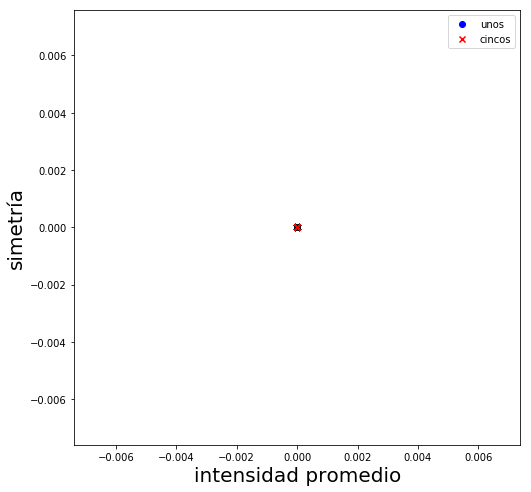

In [23]:
featuresTrain = caracterizar_digitos(Xb_train)
featuresTest = caracterizar_digitos(Xb_test)

# nombres de las características utilizadas 
nombresCaracterísticas = ['intensidad promedio', 'simetría']
# nombres de los dígitos a separar
nombresClases = ['unos', 'cincos']

plt.figure(figsize=(8,8))
plt.scatter(featuresTrain[yb_train==1, 0],featuresTrain[yb_train==1, 1], 
            color='b', marker='o', label=nombresClases[0])
plt.scatter(featuresTrain[yb_train==-1, 0],featuresTrain[yb_train==-1, 1], 
            color='r', marker='x', label=nombresClases[1])
plt.xlabel('intensidad promedio', fontsize=20)
plt.ylabel('simetría', fontsize=20)
plt.legend()

**Pregunta:** Los valores que toma una de las muestras son muy diferentes a los que toman las demás de su clase. ¿Cambiaría esto si se utiliza otra caracterización del dígito? Sugerencia: mostrar el dígito que genera la caracterización anómala   

**Respuesta:** 

Los algoritmos vistos hasta el momento en el curso utilizan una representación de los datos en coordenadas homogéneas. El siguiente bloque realiza la conversión.

In [24]:
# las características tienen que estar en coordenadas homogeneas
featuresH_train = np.ones((featuresTrain.shape[0],featuresTrain.shape[1]+1))
featuresH_train[:,1:]=featuresTrain

## Clasificación de los dígitos utilizando el perceptrón

Completar el siguiente bloque de código para que entrene un perceptrón durante 100000 iteraciones utilizando como vector inicial de pesos el vector de ceros. 

In [25]:
# Clasificación de los dígitos utilizando el perceptrón
w_inicial = np.zeros(featuresH_train.shape[1])
numIteraciones = 100000

inicio = time.time()
#######################################################
######## EMPIEZA ESPACIO PARA COMPLETAR CODIGO ########
#######################################################

# w_perceptron, error_perceptron = 

#######################################################
######## TERMINA ESPACIO PARA COMPLETAR CODIGO ########
#######################################################
fin = time.time()

print('El algoritmo perceptrón demoró %f segundos' % (fin - inicio))
print('El perceptrón finalizó en la iteración %d' % len(error_perceptron))
print('El error de entrenamiento es %f' % error_perceptron[-1])

# Se grafica el resultado del entrenamiento
visualizar_modelo_lineal(featuresH_train,yb_train,w_perceptron)

El algoritmo perceptrón demoró 0.000000 segundos


NameError: name 'error_perceptron' is not defined

## Clasificación de los dígitos utilizando el pocket

Completar el siguiente bloque de código para que entrene el algoritmo pocket durante 100000 iteraciones utilizando como vector inicial de pesos el vector de ceros. 

In [ ]:
w_inicial = np.zeros(featuresH_train.shape[1])
numIteraciones = 100000
# Se entrena el algoritmo pocket
inicio = time.time()
#######################################################
######## EMPIEZA ESPACIO PARA COMPLETAR CODIGO ########
#######################################################

# w_pocket, error_pocket = 

#######################################################
######## TERMINA ESPACIO PARA COMPLETAR CODIGO ########
#######################################################
fin = time.time()

print('El algoritmo pocket demoró %f segundos' % (fin - inicio))
print('El pocket finalizó en la iteración %d' % len(error_pocket))
print('El error de entrenamiento es %f' % error_pocket[-1])

# Se grafica el resultado del entrenamiento
visualizar_modelo_lineal(featuresH_train, yb_train, w_pocket)

## Transformación no lineal de dígitos

Utilizar el algoritmo pocket para separar los digitos en el espacio transformado. Graficar la frontera de decisión encontrada.

In [ ]:
featuresHT_train = transformar_usando_polinomio_de_tercer_grado( featuresH_train )
w_inicial = np.zeros(featuresHT_train.shape[1])
numIteraciones = 100000

#######################################################
######## EMPIEZA ESPACIO PARA COMPLETAR CODIGO ########
#######################################################


# w_pocket2, error_pocket2 = 


#######################################################
######## TERMINA ESPACIO PARA COMPLETAR CODIGO ########
#######################################################
# Se grafica el resultado del entrenamiento
visualizar_frontera_decision(featuresH_train, yb_train, w_pocket2)


**Pregunta:** Si fuera inminente la puesta en producción del clasificador de unos y ceros. ¿Qué algoritmo utilizaría?

**Respuesta:**  
...

## Evaluar con el conjunto de test

Evalúe el desempeño del *algoritmo pocket* en el conjunto de test en ambos casos.

In [ ]:
featuresH_test = np.ones((featuresTest.shape[0],featuresTest.shape[1]+1))
featuresH_test[:,1:]=featuresTest

#######################################################
######## EMPIEZA ESPACIO PARA COMPLETAR CODIGO ########
#######################################################

# Se evalúa el algoritmo pocket en el espacio original

# Se grafica el resultado 

# Se evalúa el algoritmo pocket en el espacio transformado

# Se grafica el resultado en el espacio transformado


#######################################################
######## TERMINA ESPACIO PARA COMPLETAR CODIGO ########
#######################################################

## Separación del uno de los demás digitos 

¿La representación de los dígitos utilizada en el ejercicio es adecuada para separar el uno de los demás digitos? Evalúelo con los datos que tiene disponible.